In [1]:
import numpy as np
import cv2 as cv
from numpy import cos, sin
from astropy.io import fits
from astropy import units,constants
from matplotlib import pyplot as plt

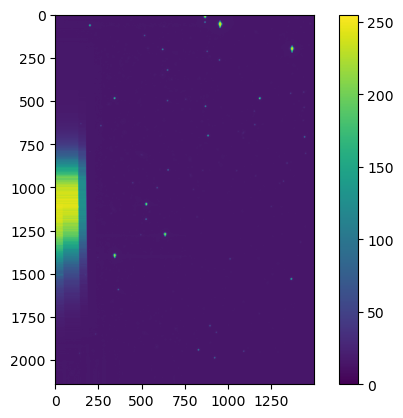

In [2]:
# coadd_DESJ2125-6504_g
g_band_full = fits.open('dataset/coadd_DESJ2125-6504/coadd_DESJ2125-6504_g.fits')
g_band_full_image = g_band_full[0].data
g_band_full_image = (g_band_full_image - g_band_full_image.min())/(g_band_full_image.max()-g_band_full_image.min())*255
plt.imshow(g_band_full_image)
plt.colorbar()

50 50


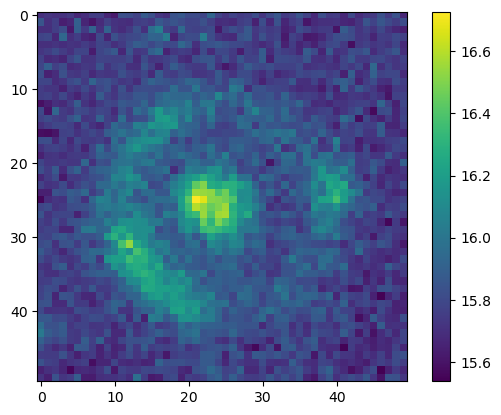

In [3]:
g_band_lens = g_band_full_image[795:845, 950:1000]
plt.imshow(g_band_lens)
plt.colorbar()
w, h = g_band_lens.shape[::-1]
print(w, h)

In [4]:
hdu_data = fits.PrimaryHDU(g_band_lens)
hdul_data = fits.HDUList([hdu_data])
hdul_data.writeto('dataset/coadd_DESJ2125-6504/Template.fits',overwrite=True)

(2140, 1500)
(2140, 1500)
(2140, 1500)


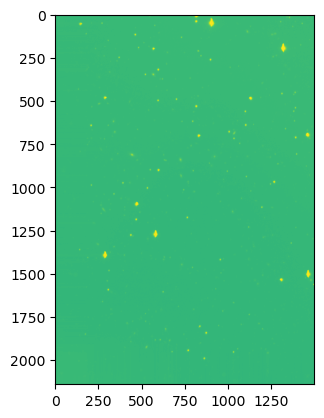

In [5]:
# coadd_DESJ2125-6504_i
i_band_full_image = fits.open('dataset/coadd_DESJ2125-6504/coadd_DESJ2125-6504_i.fits')
i_band_full_image = i_band_full_image[0].data
print(i_band_full_image.shape)
i_band_full_image = i_band_full_image - i_band_full_image.min() * (1 - np.sign(i_band_full_image.min())*0.001)
print(i_band_full_image.shape)
i_band_full_image = np.log(i_band_full_image)
print(i_band_full_image.shape)
i_band_full_image = (i_band_full_image - i_band_full_image.min())/(i_band_full_image.max()-i_band_full_image.min())*255
plt.imshow(i_band_full_image)

In [6]:
# method
method =cv.TM_CCOEFF_NORMED

img = i_band_full_image.copy()

# Apply template Matching
res = cv.matchTemplate(img,g_band_lens,method)

min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
threshold = 2
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
 cv.rectangle(g_band_full_image, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

In [7]:
max_loc

(897, 798)

In [8]:
g_band_lens

array([[15.699368, 15.724131, 15.704321, ..., 15.745591, 15.839688,
        15.666351],
       [15.852895, 15.70267 , 15.760448, ..., 15.80337 , 15.753845,
        15.819879],
       [15.701018, 15.699368, 15.760448, ..., 15.715877, 15.671305,
        15.641589],
       ...,
       [15.839688, 15.767053, 15.753845, ..., 15.732385, 15.808323,
        15.755496],
       [15.653145, 15.704321, 15.730734, ..., 15.646542, 15.74064 ,
        15.676256],
       [15.719178, 15.64324 , 15.836387, ..., 15.842991, 15.833085,
        15.727432]], dtype=float32)

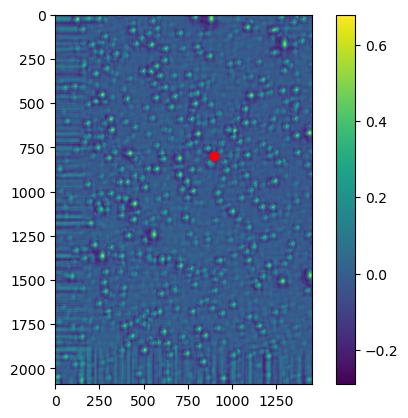

In [9]:
plt.imshow(res)
plt.colorbar()
plt.scatter(*max_loc,color='r')

In [10]:
cv.minMaxLoc(res)

(-0.2897306978702545, 0.6781038045883179, (770, 0), (897, 798))

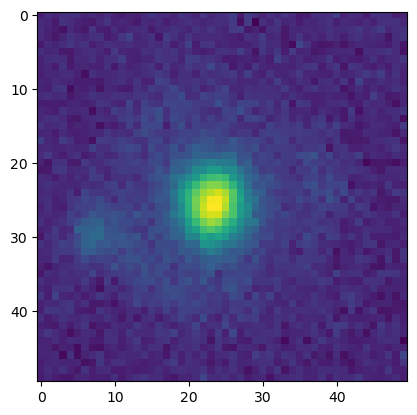

In [11]:
i_band_lens = i_band_full_image[max_loc[1]:max_loc[1]+h,max_loc[0]:max_loc[0]+w]
plt.imshow(np.log(i_band_lens))

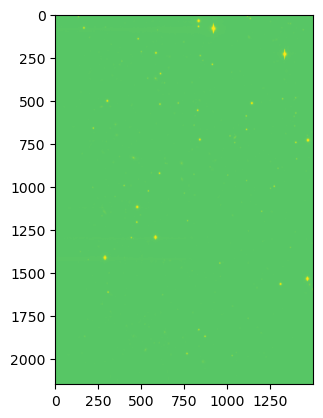

In [12]:
r_band_full = fits.open('dataset/coadd_DESJ2125-6504/coadd_DESJ2125-6504_r.fits')
r_band_full_image = r_band_full[0].data
r_band_full_image = r_band_full_image - r_band_full_image.min() * (1 - np.sign(r_band_full_image.min())*0.001)
r_band_full_image = np.log(r_band_full_image)
r_band_full_image = (r_band_full_image - r_band_full_image.min())/(r_band_full_image.max()-r_band_full_image.min())*255
plt.imshow(r_band_full_image)

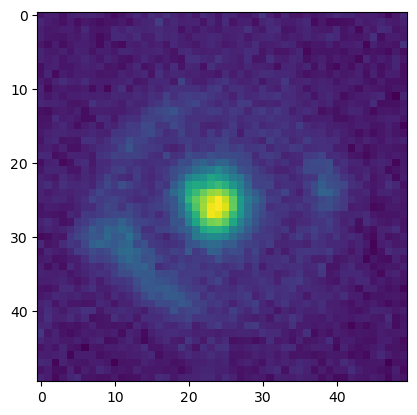

In [13]:
# method
method =cv.TM_CCOEFF_NORMED

img = r_band_full_image.copy()

# Apply template Matching
res = cv.matchTemplate(img,g_band_lens,method)

min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
threshold = 2
loc = np.where( res >= threshold)
r_band_lens = r_band_full_image[max_loc[1]:max_loc[1]+h,max_loc[0]:max_loc[0]+w]
plt.imshow(np.log(r_band_lens))

In [14]:
max_loc

(908, 824)

array([[188.7098 , 188.82007, 188.78658, ..., 189.05815, 189.15271,
        189.12675],
       [188.70015, 188.59656, 188.90129, ..., 189.11021, 189.06526,
        188.98935],
       [188.79137, 188.95609, 189.18575, ..., 189.12675, 189.1055 ,
        189.1173 ],
       ...,
       [189.00598, 189.1173 , 189.1173 , ..., 189.2845 , 188.91559,
        188.49733],
       [189.00598, 189.13148, 189.14093, ..., 189.32437, 188.80333,
        188.61345],
       [189.00598, 189.14093, 189.14093, ..., 189.11494, 188.91559,
        188.61345]], dtype=float32)

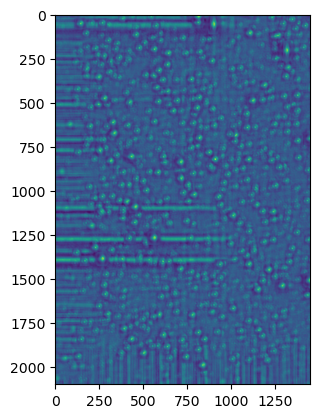

In [15]:
plt.imshow(res)
r_band_full_image

/var/folders/1y/qhrcc8cj37584sr0mdy83jtr0000gp/T/ipykernel_28902/1226230109.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(131)


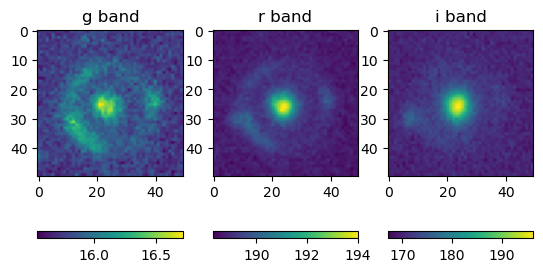

In [16]:
fig, ax = plt.subplots()

ax1 = plt.subplot(131)
img1 = ax1.imshow(g_band_lens)
plt.title("g band")
cb1 = fig.colorbar(img1, orientation='horizontal')

ax1 = plt.subplot(132)
img2 = ax1.imshow(r_band_lens)
plt.title("r band")
cb2 = fig.colorbar(img2, orientation='horizontal' )

ax1 = plt.subplot(133)
img3 = ax1.imshow(i_band_lens)
plt.title("i band")
cb3 = fig.colorbar(img3, orientation='horizontal')

plt.show()

In [17]:
rgi_lens = np.stack([g_band_lens, i_band_lens, r_band_lens], axis=2)

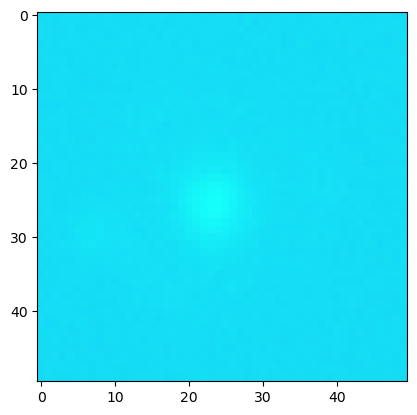

In [18]:
plt.imshow(rgi_lens/rgi_lens.max())

In [19]:
rgi_lens = np.log(rgi_lens - rgi_lens.min() + 0.01)
rgi_lens = (rgi_lens - rgi_lens.min()) / (rgi_lens.max()- rgi_lens.min())

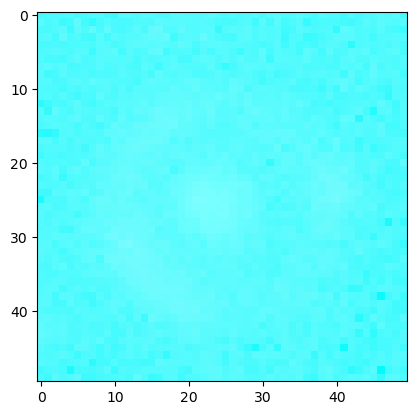

In [20]:
plt.imshow(rgi_lens, cmap="rainbow")

(1) rgi_lens.max() -> 75
    rgi_lens.min() -> 15
(2) (rgi_lens- 15) -> (60,0.1)